In [1]:
import pandas as pd
import numpy as np
from scipy.stats import pearsonr
import matplotlib.pyplot as plt

import seaborn as sns


import os

%matplotlib inline

In [2]:
df1 = pd.read_csv('datasets/annual-working-hours-per-worker.csv')
df2 = pd.read_csv('datasets/gdp-per-capita-worldbank.csv')
df3 = pd.read_csv('datasets/life-expectancy.csv')
df4 = pd.read_csv('datasets/number-of-internet-users.csv')
df5 = pd.read_csv('datasets/population.csv')
df6 = pd.read_csv('datasets/share-with-mental-and-substance-disorders.csv')
df7 = pd.read_csv('datasets/suicide-death-rates_per_10k.csv')
df8 = pd.read_csv('datasets/unemployment-rate.csv')
df9 = pd.read_csv('datasets/optional/children-born-per-woman.csv')
df10 = pd.read_csv('datasets/optional/happiness-cantril-ladder.csv')
df11 = pd.read_csv('datasets/optional/prevalence-by-mental-and-substance-use-disorder.csv')
df12 = pd.read_csv('datasets/optional/prevalence-of-depression-males-vs-females.csv')
df13 = pd.read_csv('datasets/optional/share-of-individuals-using-the-internet.csv')
df14 = pd.read_csv('datasets/optional/share-with-depression.csv')
df15 = pd.read_csv('datasets/optional/mobile-cellular-subscriptions-per-100-people.csv')
df16 = pd.read_csv('datasets/optional/fixed-telephone-subscriptions-per-100-people.csv')

df_list = [df1, df2, df3, df4, df5, df6, df7, df8, df9, df10, df11, df12, df13, df14, df15, df16]


# Set the first dataframe as the combined dataframe
combined_df = df_list[0]

# Use a for loop to iterate through the rest of the dataframes
for i in range(1, len(df_list)):
    # Merge the current dataframe with the combined dataframe
    combined_df = pd.merge(combined_df, df_list[i], on=['Entity', 'Year', 'Code'])

# The combined dataframe now contains all of the data from the input dataframes
df = combined_df

In [3]:
df

,Entity,Code,Year,Average annual working hours per worker,"GDP per capita, PPP (constant 2017 international $)",Life expectancy at birth (historical),Number of Internet users,Population (historical estimates)_x,Prevalence - Mental disorders - Sex: Both - Age: Age-standardized (Percent),Deaths - Self-harm - Sex: Both - Age: Age-standardized (Rate),...,Prevalence - Depressive disorders - Sex: Both - Age: Age-standardized (Percent)_x,Prevalence - Alcohol use disorders - Sex: Both - Age: Age-standardized (Percent),Prevalence - Depressive disorders - Sex: Male - Age: Age-standardized (Percent),Prevalence - Depressive disorders - Sex: Female - Age: Age-standardized (Percent),Population (historical estimates)_y,Continent,Individuals using the Internet (% of population),Prevalence - Depressive disorders - Sex: Both - Age: Age-standardized (Percent)_y,Mobile cellular subscriptions (per 100 people),Fixed telephone subscriptions (per 100 people)
0,Argentina,ARG,2004,1730.8173,18032.611328,74.9,6201193,38668796,13.90,10.90,...,2.82,2.48,2.15,3.42,38668796.0,NaN,16.036684,2.82,35.104420,22.759462
1,Argentina,ARG,2005,1761.3994,19426.439453,75.1,6923521,39070504,13.90,10.72,...,2.82,2.46,2.14,3.43,39070504.0,NaN,17.720583,2.82,56.967747,24.276064
2,Argentina,ARG,2006,1765.6013,20777.652344,75.4,8261401,39476856,13.86,10.63,...,2.79,2.42,2.13,3.40,39476856.0,NaN,20.927202,2.79,80.199768,24.076923
3,Argentina,ARG,2007,1780.5565,22424.117188,75.0,10346509,39876116,13.76,10.94,...,2.73,2.38,2.09,3.32,39876116.0,NaN,25.946632,2.73,101.807961,23.938942
4,Argentina,ARG,2008,1781.4246,23103.457031,75.6,11322013,40273768,13.64,10.89,...,2.67,2.32,2.05,3.23,40273768.0,NaN,28.112623,2.67,116.039391,24.308369
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
773,Vietnam,VNM,2013,2267.4883,5815.175293,73.8,34753078,90267736,9.55,8.08,...,2.57,1.23,1.93,3.15,90267736.0,NaN,38.500000,2.57,136.343826,7.410619
774,Vietnam,VNM,2014,2150.6357,6098.539062,73.9,37406557,91235504,9.59,8.13,...,2.57,1.24,1.94,3.14,91235504.0,NaN,41.000000,2.57,148.448822,7.332948
775,Vietnam,VNM,2015,2169.5916,6438.259766,73.9,41486130,92191400,9.59,8.12,...,2.58,1.24,1.95,3.14,92191400.0,Asia,45.000000,2.58,129.831512,7.903731
776,Vietnam,VNM,2016,2169.5916,6767.778809,73.9,49357060,93126528,9.57,8.11,...,2.58,1.24,1.95,3.14,93126528.0,NaN,53.000000,2.58,128.790787,5.978206


In [4]:
# Check the number of NaN values in each column
nan_counts = df.isnull().sum()

# Print the counts
print(nan_counts)

Entity                                                                                 0
Code                                                                                   0
Year                                                                                   0
Average annual working hours per worker                                                0
GDP per capita, PPP (constant 2017 international $)                                    0
Life expectancy at birth (historical)                                                  0
Number of Internet users                                                               0
Population (historical estimates)_x                                                    0
Prevalence - Mental disorders - Sex: Both - Age: Age-standardized (Percent)            0
Deaths - Self-harm - Sex: Both - Age: Age-standardized (Rate)                          0
Unemployment, total (% of total labor force) (modeled ILO estimate)                    0
Fertility rate (Selec

In [5]:
continents = df['Continent'].nunique()
continents

6

In [6]:
# Create a boolean mask that indicates which rows have missing values in the 'continent' column
mask = df['Continent'].isnull()

# Select rows with missing values in the 'continent' column
cnt_nan_rows = df[mask]

# The gdp_nan_rows dataframe now contains only rows with missing values in the 'continent' column
cnt_nan_rows

# Remove the 'continent' column from the dataframe
df = df.drop('Continent', axis=1)

In [7]:
# number of nan values in each column
nan_counts = df.isnull().sum()

print(nan_counts)

Entity                                                                               0
Code                                                                                 0
Year                                                                                 0
Average annual working hours per worker                                              0
GDP per capita, PPP (constant 2017 international $)                                  0
Life expectancy at birth (historical)                                                0
Number of Internet users                                                             0
Population (historical estimates)_x                                                  0
Prevalence - Mental disorders - Sex: Both - Age: Age-standardized (Percent)          0
Deaths - Self-harm - Sex: Both - Age: Age-standardized (Rate)                        0
Unemployment, total (% of total labor force) (modeled ILO estimate)                  0
Fertility rate (Select Gapminder, v12) (201

In [8]:
# list of shortened column names
short_column_names = ['Country', 'Code', 'Year', 'Avg annual hrs',
                      'GDP per capita (PPP)', 'Life expectancy', 'Num Internet users',
                      'Population', 'Mental disorders %',
                      'Self-harm deaths rate', 'Unemployment rate', 'Fertility rate',
                      'Life satisfaction', 'Schizophrenia %',
                      'Bipolar disorder %', 'Eating disorders %',
                      'Anxiety disorders %', 'Drug use disorders %',
                      'Depressive disorders % (both)',
                      'Alcohol use disorders %',
                      'Depressive disorders % (male)',
                      'Depressive disorders % (female)', 'Population (alt)',
                      'Internet use (% of population)',
                      'Depressive disorders % (both, alt)',
                      'Mobile cellular subscriptions (per 100 people)',
                      'Fixed telephone subscriptions (per 100 people)']

df.columns = short_column_names

In [9]:
df

,Country,Code,Year,Avg annual hrs,GDP per capita (PPP),Life expectancy,Num Internet users,Population,Mental disorders %,Self-harm deaths rate,...,Drug use disorders %,Depressive disorders % (both),Alcohol use disorders %,Depressive disorders % (male),Depressive disorders % (female),Population (alt),Internet use (% of population),"Depressive disorders % (both, alt)",Mobile cellular subscriptions (per 100 people),Fixed telephone subscriptions (per 100 people)
0,Argentina,ARG,2004,1730.8173,18032.611328,74.9,6201193,38668796,13.90,10.90,...,0.71,2.82,2.48,2.15,3.42,38668796.0,16.036684,2.82,35.104420,22.759462
1,Argentina,ARG,2005,1761.3994,19426.439453,75.1,6923521,39070504,13.90,10.72,...,0.71,2.82,2.46,2.14,3.43,39070504.0,17.720583,2.82,56.967747,24.276064
2,Argentina,ARG,2006,1765.6013,20777.652344,75.4,8261401,39476856,13.86,10.63,...,0.72,2.79,2.42,2.13,3.40,39476856.0,20.927202,2.79,80.199768,24.076923
3,Argentina,ARG,2007,1780.5565,22424.117188,75.0,10346509,39876116,13.76,10.94,...,0.73,2.73,2.38,2.09,3.32,39876116.0,25.946632,2.73,101.807961,23.938942
4,Argentina,ARG,2008,1781.4246,23103.457031,75.6,11322013,40273768,13.64,10.89,...,0.74,2.67,2.32,2.05,3.23,40273768.0,28.112623,2.67,116.039391,24.308369
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
773,Vietnam,VNM,2013,2267.4883,5815.175293,73.8,34753078,90267736,9.55,8.08,...,0.61,2.57,1.23,1.93,3.15,90267736.0,38.500000,2.57,136.343826,7.410619
774,Vietnam,VNM,2014,2150.6357,6098.539062,73.9,37406557,91235504,9.59,8.13,...,0.61,2.57,1.24,1.94,3.14,91235504.0,41.000000,2.57,148.448822,7.332948
775,Vietnam,VNM,2015,2169.5916,6438.259766,73.9,41486130,92191400,9.59,8.12,...,0.61,2.58,1.24,1.95,3.14,92191400.0,45.000000,2.58,129.831512,7.903731
776,Vietnam,VNM,2016,2169.5916,6767.778809,73.9,49357060,93126528,9.57,8.11,...,0.62,2.58,1.24,1.95,3.14,93126528.0,53.000000,2.58,128.790787,5.978206


In [10]:
df['Year'].unique()

array([2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014,
       2015, 2016, 2017, 2003], dtype=int64)

In [11]:
countries_dict = {
    'Argentina': ('South America', 'Developing'),
    'Australia': ('Oceania', 'Developed'),
    'Austria': ('Europe', 'Developed'),
    'Bangladesh': ('Asia', 'Developing'),
    'Belgium': ('Europe', 'Developed'),
    'Brazil': ('South America', 'Developing'),
    'Bulgaria': ('Europe', 'Developing'),
    'Cambodia': ('Asia', 'Developing'),
    'Canada': ('North America', 'Developed'),
    'Chile': ('South America', 'Developing'),
    'China': ('Asia', 'Developing'),
    'Colombia': ('South America', 'Developing'),
    'Costa Rica': ('Central America', 'Developing'),
    'Croatia': ('Europe', 'Developing'),
    'Cyprus': ('Europe', 'Developing'),
    'Czechia': ('Europe', 'Developed'),
    'Denmark': ('Europe', 'Developed'),
    'Ecuador': ('South America', 'Developing'),
    'Estonia': ('Europe', 'Developed'),
    'Finland': ('Europe', 'Developed'),
    'France': ('Europe', 'Developed'),
    'Germany': ('Europe', 'Developed'),
    'Greece': ('Europe', 'Developing'),
    'Hungary': ('Europe', 'Developing'),
    'Iceland': ('Europe', 'Developed'),
    'India': ('Asia', 'Developing'),
    'Indonesia': ('Asia', 'Developing'),
    'Ireland': ('Europe', 'Developed'),
    'Israel': ('Asia', 'Developed'),
    'Italy': ('Europe', 'Developed'),
    'Japan': ('Asia', 'Developed'),
    'Latvia': ('Europe', 'Developed'),
    'Lithuania': ('Europe', 'Developed'),
    'Luxembourg': ('Europe', 'Developed'),
    'Malaysia': ('Asia', 'Developing'),
    'Malta': ('Europe', 'Developing'),
    'Mexico': ('North America', 'Developing'),
    'Myanmar': ('Asia', 'Developing'),
    'Netherlands': ('Europe', 'Developed'),
    'New Zealand': ('Oceania', 'Developed'),
    'Nigeria': ('Africa', 'Developing'),
    'Norway': ('Europe', 'Developed'),
    'Pakistan': ('Asia', 'Developing'),
    'Peru': ('South America', 'Developing'),
    'Philippines': ('Asia', 'Developing'),
    'Poland': ('Europe', 'Developing'),
    'Portugal': ('Europe', 'Developing'),
    'Romania': ('Europe', 'Developing'),
    'Russia': ('Europe', 'Developing'),
    'Slovenia': ('Europe', 'Developing'),
    'South Africa': ('Africa', 'Developing'),
    'Spain': ('Europe', 'Developed'),
    'Sri Lanka': ('Asia', 'Developing'),
    'Sweden': ('Europe', 'Developed'),
    'Switzerland': ('Europe', 'Developed'),
    'Thailand': ('Asia', 'Developing'),
    'Turkey': ('Europe', 'Developing'),
    'United Kingdom': ('Europe', 'Developed'),
    'United States': ('North America', 'Developed'),
    'Uruguay': ('South America', 'Developing'),
    'Vietnam': ('Asia', 'Developing')
}


In [12]:
for index, row in df.iterrows():
    country = row['Country']
    if country in countries_dict:
        continent, status = countries_dict[country]
        df.at[index, 'Continent'] = continent
        df.at[index, 'Development status'] = status

In [13]:
hz = df['Continent']

hz.unique()

array(['South America', 'Oceania', 'Europe', 'Asia', 'North America',
       'Central America', 'Africa'], dtype=object)

In [14]:
country = 'Luxembourg'
luxembourg_data = df.loc[df['Country'] == country]
luxembourg_data

,Country,Code,Year,Avg annual hrs,GDP per capita (PPP),Life expectancy,Num Internet users,Population,Mental disorders %,Self-harm deaths rate,...,Alcohol use disorders %,Depressive disorders % (male),Depressive disorders % (female),Population (alt),Internet use (% of population),"Depressive disorders % (both, alt)",Mobile cellular subscriptions (per 100 people),Fixed telephone subscriptions (per 100 people),Continent,Development status
433,Luxembourg,LUX,2007,1566.2959,120647.820312,79.5,378719,479877,15.05,10.16,...,2.56,2.93,4.37,479877.0,78.919998,3.68,144.131058,52.261982,Europe,Developed
434,Luxembourg,LUX,2008,1566.9690,118154.664062,80.5,401811,488643,15.00,9.74,...,2.54,2.90,4.31,488643.0,82.230003,3.63,145.651566,53.687126,Europe,Developed
435,Luxembourg,LUX,2009,1516.4703,112230.078125,80.6,434696,497876,14.96,9.51,...,2.53,2.87,4.26,497876.0,87.309998,3.59,145.007217,53.088753,Europe,Developed
436,Luxembourg,LUX,2010,1516.4979,114343.984375,80.6,459511,507075,14.94,9.36,...,2.52,2.86,4.24,507075.0,90.620003,3.57,143.141510,53.633766,Europe,Developed
437,Luxembourg,LUX,2011,1515.0692,112998.390625,80.8,466541,518207,14.94,9.35,...,2.51,2.84,4.24,518207.0,90.029861,3.56,147.306503,53.750481,Europe,Developed
438,Luxembourg,LUX,2012,1508.0867,112137.132812,81.0,487883,530596,14.93,9.27,...,2.50,2.83,4.24,530596.0,91.949921,3.55,143.412262,50.239517,Europe,Developed
439,Luxembourg,LUX,2013,1502.6809,113050.664062,81.4,509270,543068,14.93,9.09,...,2.49,2.82,4.24,543068.0,93.776497,3.55,145.305771,49.321735,Europe,Developed
440,Luxembourg,LUX,2014,1508.2611,113313.578125,81.7,526436,556075,14.93,9.19,...,2.48,2.81,4.24,556075.0,94.669998,3.54,144.702774,48.889481,Europe,Developed
441,Luxembourg,LUX,2015,1521.0288,113182.726562,81.8,548783,569415,14.93,9.24,...,2.48,2.81,4.24,569415.0,96.376717,3.54,142.357803,48.858295,Europe,Developed
442,Luxembourg,LUX,2016,1519.5106,116283.703125,82.1,572485,583355,14.91,8.89,...,2.47,2.81,4.23,583355.0,98.136696,3.54,131.891510,47.715721,Europe,Developed


In [15]:
df.loc[df['Year'] == 2017]


,Country,Code,Year,Avg annual hrs,GDP per capita (PPP),Life expectancy,Num Internet users,Population,Mental disorders %,Self-harm deaths rate,...,Alcohol use disorders %,Depressive disorders % (male),Depressive disorders % (female),Population (alt),Internet use (% of population),"Depressive disorders % (both, alt)",Mobile cellular subscriptions (per 100 people),Fixed telephone subscriptions (per 100 people),Continent,Development status
13,Argentina,ARG,2017,1691.5363,23597.117188,76.8,32730336,44054616,13.60,10.55,...,2.21,2.01,3.14,4.405462e+07,74.294907,2.60,140.877121,22.177975,South America,Developing
25,Australia,AUS,2017,1731.4943,48398.550781,83.0,21281719,24590336,18.96,10.50,...,2.00,3.87,5.56,2.459034e+07,86.545052,4.73,108.441780,34.411758,Oceania,Developed
37,Austria,AUT,2017,1613.0519,54172.988281,81.6,7736130,8797497,15.79,11.54,...,2.78,2.61,4.18,8.797497e+06,87.935585,3.41,123.119293,42.077568,Europe,Developed
51,Bangladesh,BGD,2017,2232.3542,4160.703125,71.8,32035204,161793968,11.83,4.67,...,1.10,3.57,5.85,1.617940e+08,19.799999,4.73,94.526474,0.443101,Asia,Developing
64,Belgium,BEL,2017,1544.2690,50442.269531,81.4,9981885,11384491,15.00,15.25,...,2.52,3.17,4.57,1.138449e+07,87.679680,3.89,99.453033,37.494854,Europe,Developed
78,Brazil,BRA,2017,1709.4856,14524.613281,74.8,140680972,208504960,16.70,5.92,...,3.24,2.78,5.09,2.085050e+08,67.471283,3.99,106.464485,19.426914,South America,Developing
89,Bulgaria,BGR,2017,1643.5475,21469.945312,74.8,4554386,7182430,11.14,10.66,...,1.84,2.03,3.64,7.182430e+06,63.410103,2.87,120.140450,18.160692,Europe,Developing
103,Cambodia,KHM,2017,2455.5508,3928.374023,70.5,5208343,15830694,12.42,5.25,...,0.76,2.63,3.39,1.583069e+07,32.900280,3.05,116.012856,0.830206,Asia,Developing
117,Canada,CAN,2017,1696.4624,48317.175781,82.0,33886378,36554344,14.96,11.55,...,2.01,2.73,4.40,3.655434e+07,92.701370,3.59,86.281494,39.390621,North America,Developed
131,Chile,CHL,2017,1974.0000,24470.703125,80.4,15122391,18368582,15.33,9.82,...,2.87,2.72,5.22,1.836858e+07,82.327484,4.02,124.594475,17.326307,South America,Developing


In [16]:
# df_top_10 = df_sorted.head(10)
# df_top_10

# !!! неправильно сортирует

<AxesSubplot: xlabel='Development status'>

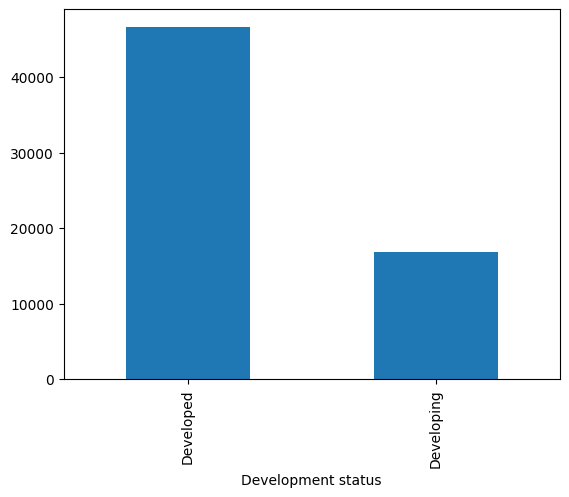

In [17]:

# Filter the dataframe to only include rows where the 'Development status' column is 'Developed' or 'Developing'
df_status = df[df['Development status'].isin(['Developed', 'Developing'])]

# Group the data by 'Development status' and calculate the mean GDP per capita for each group
mean_gdp = df_status.groupby('Development status')['GDP per capita (PPP)'].mean()

# Create a bar chart to visualize the comparison
mean_gdp.plot(kind='bar')

In [18]:
df_gdp_by_dev_status = df.groupby(['Year', 'Development status'])['GDP per capita (PPP)'].mean().reset_index()

Text(0, 0.5, 'GDP per capita (PPP)')

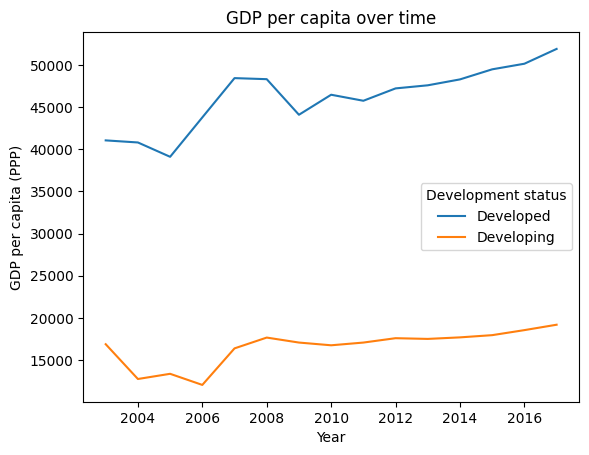

In [19]:
sns.lineplot(x='Year', y='GDP per capita (PPP)', hue='Development status', data=df_gdp_by_dev_status)

plt.title('GDP per capita over time')
plt.xlabel('Year')
plt.ylabel('GDP per capita (PPP)')

# GDP Inequality

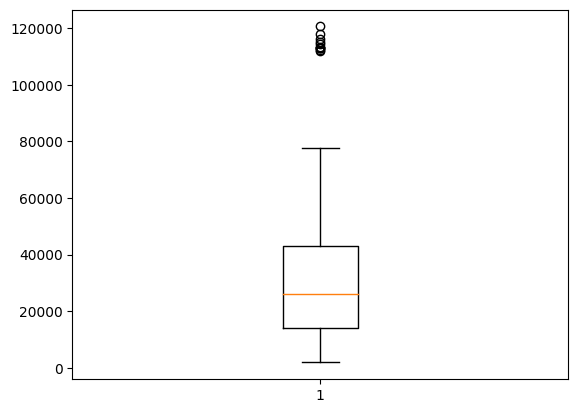

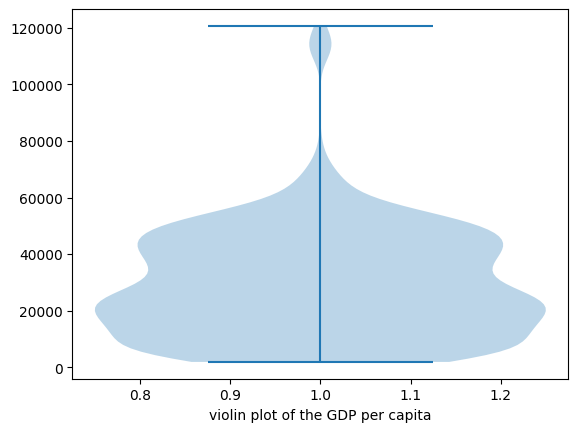

In [20]:
# Create a box plot of the GDP per capita data
plt.boxplot(df['GDP per capita (PPP)'])
plt.show()

# Create a violin plot of the GDP per capita data
plt.xlabel('violin plot of the GDP per capita')
plt.violinplot(df['GDP per capita (PPP)'])

plt.show()


# Worldwide GDP Growth

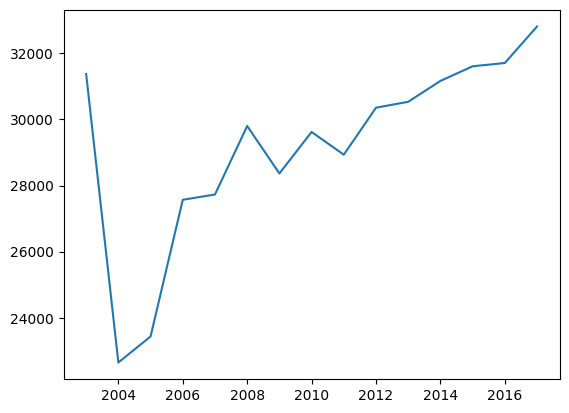

In [21]:
# select the data for all years
all_years = df.groupby('Year')['GDP per capita (PPP)'].mean()

# create the line chart
plt.plot(all_years.index, all_years.values)

# show the plot
plt.show()

# People who work more have more income?

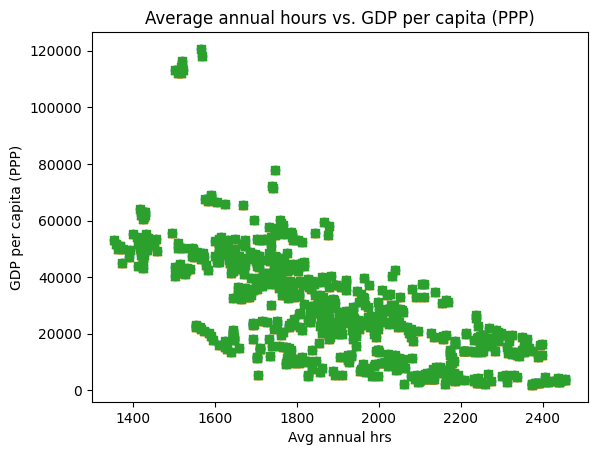

In [22]:
# Select the 'Avg annual hrs' and 'GDP per capita (PPP)' columns
x = df['Avg annual hrs']
y = df['GDP per capita (PPP)']

# Create a scatter plot with different marker shapes
plt.scatter(x, y, marker='o')
plt.scatter(x, y, marker='^')
plt.scatter(x, y, marker='s')

# Add a title and axis labels
plt.title('Average annual hours vs. GDP per capita (PPP)')
plt.xlabel('Avg annual hrs')
plt.ylabel('GDP per capita (PPP)')

# Show the plot
plt.show()

# как мы видим отсюда - нет. это не связано
## скорее наоборот

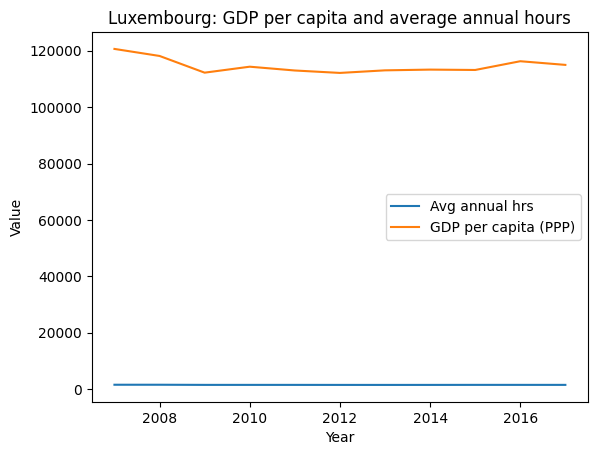

In [23]:
# Select the rows for Luxembourg
luxembourg = df[df['Country'] == 'Luxembourg']

# Select the 'Year', 'Avg annual hrs', and 'GDP per capita (PPP)' columns
x = luxembourg['Year']
y1 = luxembourg['Avg annual hrs']
y2 = luxembourg['GDP per capita (PPP)']

# Create a line chart
plt.plot(x, y1, label='Avg annual hrs')
plt.plot(x, y2, label='GDP per capita (PPP)')

# Add a legend and axis labels
plt.legend()
plt.xlabel('Year')
plt.ylabel('Value')

# Add a title
plt.title('Luxembourg: GDP per capita and average annual hours')

# Show the plot
plt.show()

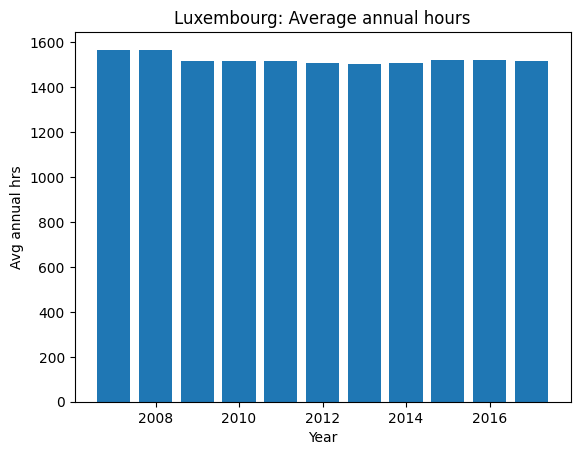

In [24]:
# Select the rows for Luxembourg
luxembourg = df[df['Country'] == 'Luxembourg']

# Select the 'Year' and 'Avg annual hrs' columns
x = luxembourg['Year']
y = luxembourg['Avg annual hrs']

# Create a bar chart
plt.bar(x, y)

# Add axis labels and a title
plt.xlabel('Year')
plt.ylabel('Avg annual hrs')
plt.title('Luxembourg: Average annual hours')

# Show the plot
plt.show()

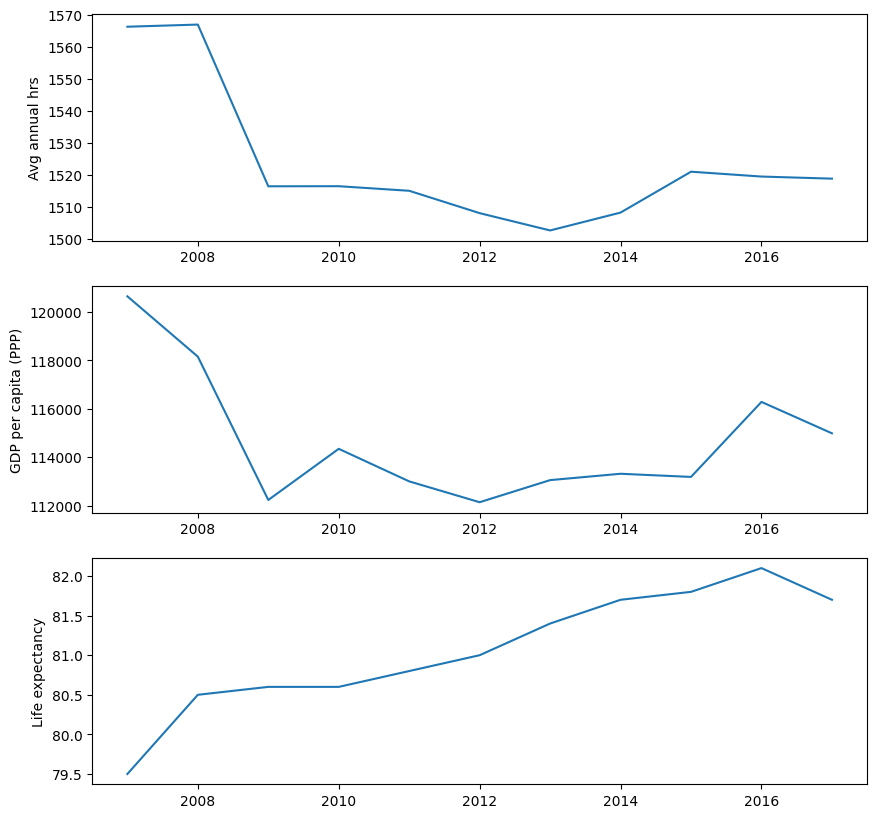

In [25]:
# Select the rows for Luxembourg
luxembourg = df[df['Country'] == 'Luxembourg']

# Create a figure with three subplots
fig, axs = plt.subplots(3, 1, figsize=(10, 10))

# Plot the 'Avg annual hrs' variable in the first subplot
axs[0].plot(luxembourg['Year'], luxembourg['Avg annual hrs'])
axs[0].set_ylabel('Avg annual hrs')

# Plot the 'GDP per capita (PPP)' variable in the second subplot
axs[1].plot(luxembourg['Year'], luxembourg['GDP per capita (PPP)'])
axs[1].set_ylabel('GDP per capita (PPP)')

# Plot the 'Life expectancy' variable in the third subplot
axs[2].plot(luxembourg['Year'], luxembourg['Life expectancy'])
axs[2].set_ylabel('Life expectancy')

# Show the plot
plt.show()

# People who work more, live less?
###### relationship between the number of average annual working hours per worker and life expectancy at birth

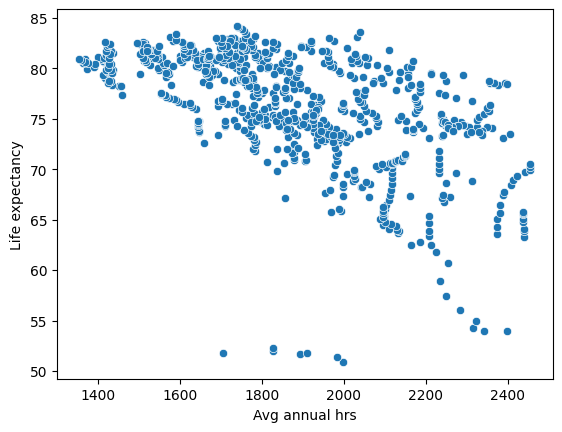

In [26]:
# Create a scatter plot with 'Avg annual hrs' on the x-axis and 'Life expectancy' on the y-axis
sns.scatterplot(x='Avg annual hrs', y='Life expectancy', data=df)

# Show the plot
plt.show()

### So here is the proof

In [27]:
# Compute the Pearson correlation coefficient
r, p = pearsonr(df['Avg annual hrs'], df['Life expectancy'])

# Print the coefficient and p-value
print(f'Pearson correlation coefficient: {r:.2f}')
print(f'p-value: {p:.2f}')

Pearson correlation coefficient: -0.58
p-value: 0.00


###### A negative correlation coefficient of -0.58 could indicate that countries with higher average annual working hours per worker tend to have lower life expectancy at birth, and vice versa.

###### also, p-value of the Pearson correlation coefficient is less than 0.05, it indicates that the correlation between the two variables is statistically significant. This means that there is a strong likelihood that the relationship between the variables is not due to chance, and that the variables are correlated in some way.

# Люди которые много работают способны суициду больше чем остальные?

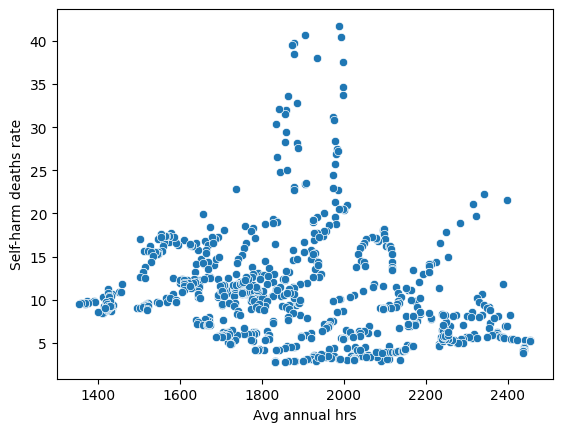

In [28]:
# Create a scatter plot with 'Avg annual hrs' on the x-axis and 'Self-harm deaths rate' on the y-axis
sns.scatterplot(x='Avg annual hrs', y='Self-harm deaths rate', data=df)

# Show the plot
plt.show()

## Как мы видим - скорее всего нет. тут фиг пойми ничего не понятно

# Relationship between Suicide and Mental health

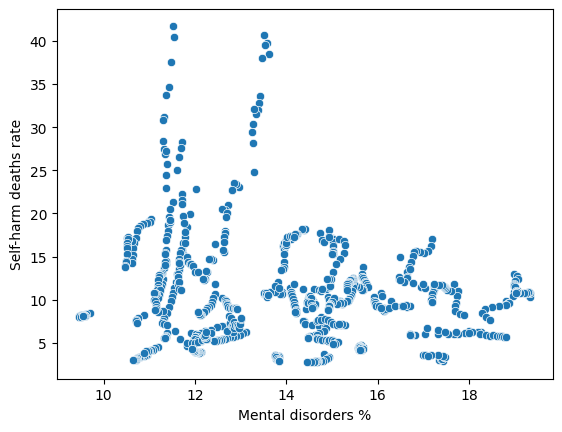

In [29]:


# Create a scatter plot with 'Mental disorders %' on the x-axis and 'Self-harm deaths rate' on the y-axis
sns.scatterplot(x='Mental disorders %', y='Self-harm deaths rate', data=df)

# Show the plot
plt.show()

In [30]:
# Compute the Pearson correlation coefficient
r, p = pearsonr(df['Mental disorders %'], df['Self-harm deaths rate'])

# Print the correlation coefficient
print(r)

# Print the p-value
print(p)


-0.16368894286587987
4.445931122210004e-06


### ппц короче, прогадал жестко прям


# ТЕМА - HAPPINESS

## Compare happiness with GDP per capita


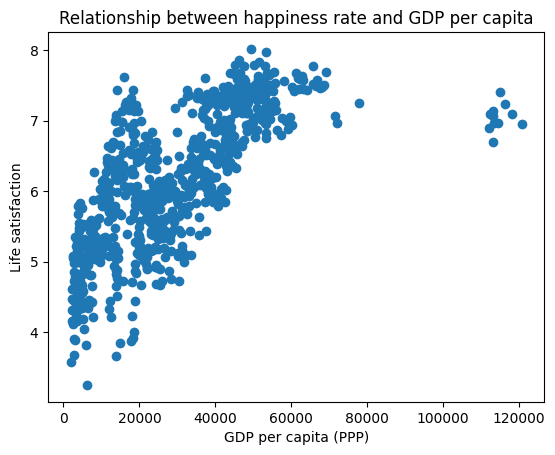

In [44]:
# Extract the relevant columns from the data frame
gdp_per_capita = df['GDP per capita (PPP)']
happiness_rate = df['Life satisfaction']

# Create the scatter plot
plt.scatter(gdp_per_capita, happiness_rate)
# Compare happiness with GDP per capita
# Add labels and a title
plt.xlabel('GDP per capita (PPP)')
plt.ylabel('Life satisfaction')
plt.title('Relationship between happiness rate and GDP per capita')

# Show the plot
plt.show()

##### как мы видим - да, скорее есть relation чем нет

## Compare happiness with unemployment rate

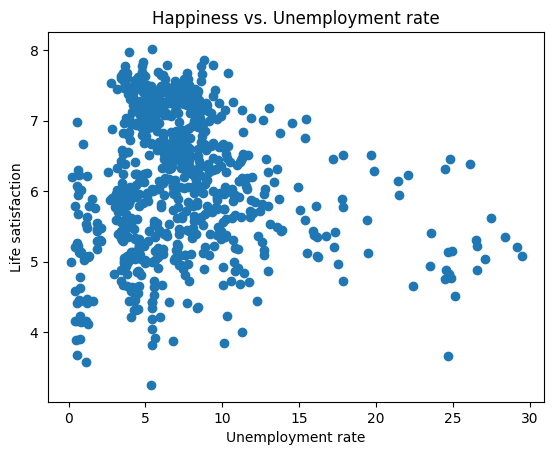

In [41]:
# Extract the relevant columns from the dataframe
x = df['Unemployment rate']
y = df['Life satisfaction']

# Create the scatterplot
plt.scatter(x, y)
plt.xlabel('Unemployment rate')
plt.ylabel('Life satisfaction')
plt.title('Happiness vs. Unemployment rate')
plt.show()

##### скорее да чем нет